In [3]:
#Plot styling
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [4]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.8,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [5]:
#Other imports
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [6]:
from bin.futils import load_fisher

In [22]:
#Locate fishers, label and color them too
so_base_fisher_files = ['../userdata/so/base/sum_so_base_abund_plus_planck.pkl',
                        '../userdata/so/base/sum_so_base_abund_plus_planck_clustering_abias_1e-2photoz.pkl',
                        '../userdata/so/base/sum_so_base_abund_plus_planck_clustering_1e-2photoz.pkl']

so_goal_fisher_files = ['../userdata/so/goal/sum_so_goal_abund_plus_planck.pkl',
                        '../userdata/so/goal/sum_so_goal_abund_plus_planck_clustering_abias_1e-2photoz.pkl',
                        '../userdata/so/goal/sum_so_goal_abund_plus_planck_clustering_1e-2photoz.pkl']

s4_fisher_files = ['../userdata/s4/sum_s4_abund_plus_planck.pkl',
                   '../userdata/s4/sum_s4_abund_plus_planck_clustering_abias_1e-2photoz.pkl',
                   '../userdata/s4/sum_s4_abund_plus_planck_clustering_1e-2photoz.pkl']

fisher_labels = ['Abundance+Planck',
                'Abundance+Planck+Clustering w/ bias uncert',
                'Abundance+Planck+Clustering']

colors = ['#2e7daa', 
          '#a80639', 
          '#f7d25b']

#Get rid of b_WL, no constraints from this (0s in the entire row and column)
so_base_fisher_list = []
for file_ in so_base_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    so_base_fisher_list.append(fishmat)

so_goal_fisher_list = []
for file_ in so_goal_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    so_goal_fisher_list.append(fishmat)

s4_fisher_list = []
for file_ in s4_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    s4_fisher_list.append(fishmat)

b_wl not in this matrix
b_wl not in this matrix
b_wl not in this matrix


/Users/dylan/Development/szar/bin/futils.py:66: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fisher.params = fisher.columns.values.tolist()


In [23]:
#One easy mistake is that the parameter 'w' has two names, w and w0. 
#Check that w wasn't used accidentally
for fisher in so_base_fisher_list:
    assert 'w' not in fisher.params
    assert 'w0' in fisher.params
for fisher in so_goal_fisher_list:
    assert 'w' not in fisher.params
    assert 'w0' in fisher.params
for fisher in s4_fisher_list:
    assert 'w' not in fisher.params
    assert 'w0' in fisher.params

In [24]:
assert so_base_fisher_list[0].params == so_goal_fisher_list[0].params
assert so_goal_fisher_list[0].params == s4_fisher_list[0].params
assert s4_fisher_list[1].params == ['As',
                                     'H0',
                                     'Ysig',
                                     'abias',
                                     'alpha_ym',
                                     'b_ym',
                                     'betaYsig',
                                     'beta_ym',
                                     'gammaYsig',
                                     'gamma_ym',
                                     'mnu',
                                     'ns',
                                     'ombh2',
                                     'omch2',
                                     'tau',
                                     'w0',
                                     'wa']

In [25]:
#Before making a bar plot, we want to add in priors on tau
# sigma(tau) = 1e-2 is good

so_base_fisher_barplot_list = []
for fish in so_base_fisher_list:
    fish_copy = fish.copy()
    #fish_with_prior.add_prior('tau', 1e-2)
    so_base_fisher_barplot_list.append(fish_copy)
    
so_goal_fisher_barplot_list = []
for fish in so_goal_fisher_list:
    fish_copy = fish.copy()
    #fish_with_prior.add_prior('tau', 1e-2)
    so_goal_fisher_barplot_list.append(fish_copy)
    
s4_fisher_barplot_list = []
for fish in s4_fisher_list:
    fish_copy = fish.copy()
    #fish_with_prior.add_prior('tau', 1e-2)
    s4_fisher_barplot_list.append(fish_copy)

/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [26]:
#The custom sigmas method of FisherMatrix options is fun
so_base_constraint_list = [fish.sigmas() for fish in so_base_fisher_barplot_list]
so_goal_constraint_list = [fish.sigmas() for fish in so_goal_fisher_barplot_list]
s4_constraint_list = [fish.sigmas() for fish in s4_fisher_barplot_list]

In [28]:
#so_base_fisher_list[0].values/so_goal_fisher_list[0].values

In [29]:
#Quickly pump out a percent improvement
def get_improvement(param, constraint_list):
    print(f'{param}, Optimal: {100 * (1 - constraint_list[2][param]/constraint_list[0][param])}')
    print(f'{param}, Conservative: {100 * (1 - constraint_list[1][param]/constraint_list[0][param])}')

In [30]:
#Generates some of the numbers quoted in the abstract
params_to_quote = ['w0', 'wa']
experiments = ['SO base', 'SO goal', 'S4']
constraint_lists = [so_base_constraint_list, so_goal_constraint_list, s4_constraint_list]

for exp,constraints in zip(experiments, constraint_lists):
    print(exp)
    for param in params_to_quote:
        get_improvement(param, constraints)

SO base
w0, Optimal: 20.827405593121064
w0, Conservative: 2.819911662799812
wa, Optimal: 8.11216928962507
wa, Conservative: 1.5845685561651557
SO goal
w0, Optimal: 22.076379970633266
w0, Conservative: 3.1742644203012205
wa, Optimal: 8.632536886222509
wa, Conservative: 1.8114689589373012
S4
w0, Optimal: 25.87535678897267
w0, Conservative: 4.5727056119138965
wa, Optimal: 10.767266278044918
wa, Conservative: 2.8063365609705015


In [31]:
#Call in latex symbols for prettiness
def _get_latex_params(inifile, fish_sect='fisher-clustering-abias'):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items(fish_sect, 'paramLatexList')[1][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}

ordered_params = 'omch2,ombh2,H0,ns,As,mnu,w0,wa,alpha_ym,b_ym,beta_ym,gamma_ym,Ysig,gammaYsig,betaYsig,tau,abias'
ordered_params = ordered_params.split(',')
ordered_fisher = so_base_fisher_list[1].copy().reordered(ordered_params)
for index,key in enumerate(ordered_fisher.columns.values):
    latex_paramdict[key] = latex_params[index]

In [32]:
params_to_plot = ['H0', 'omch2', 'mnu', 'w0', 'wa']
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [33]:
import pandas as pd

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


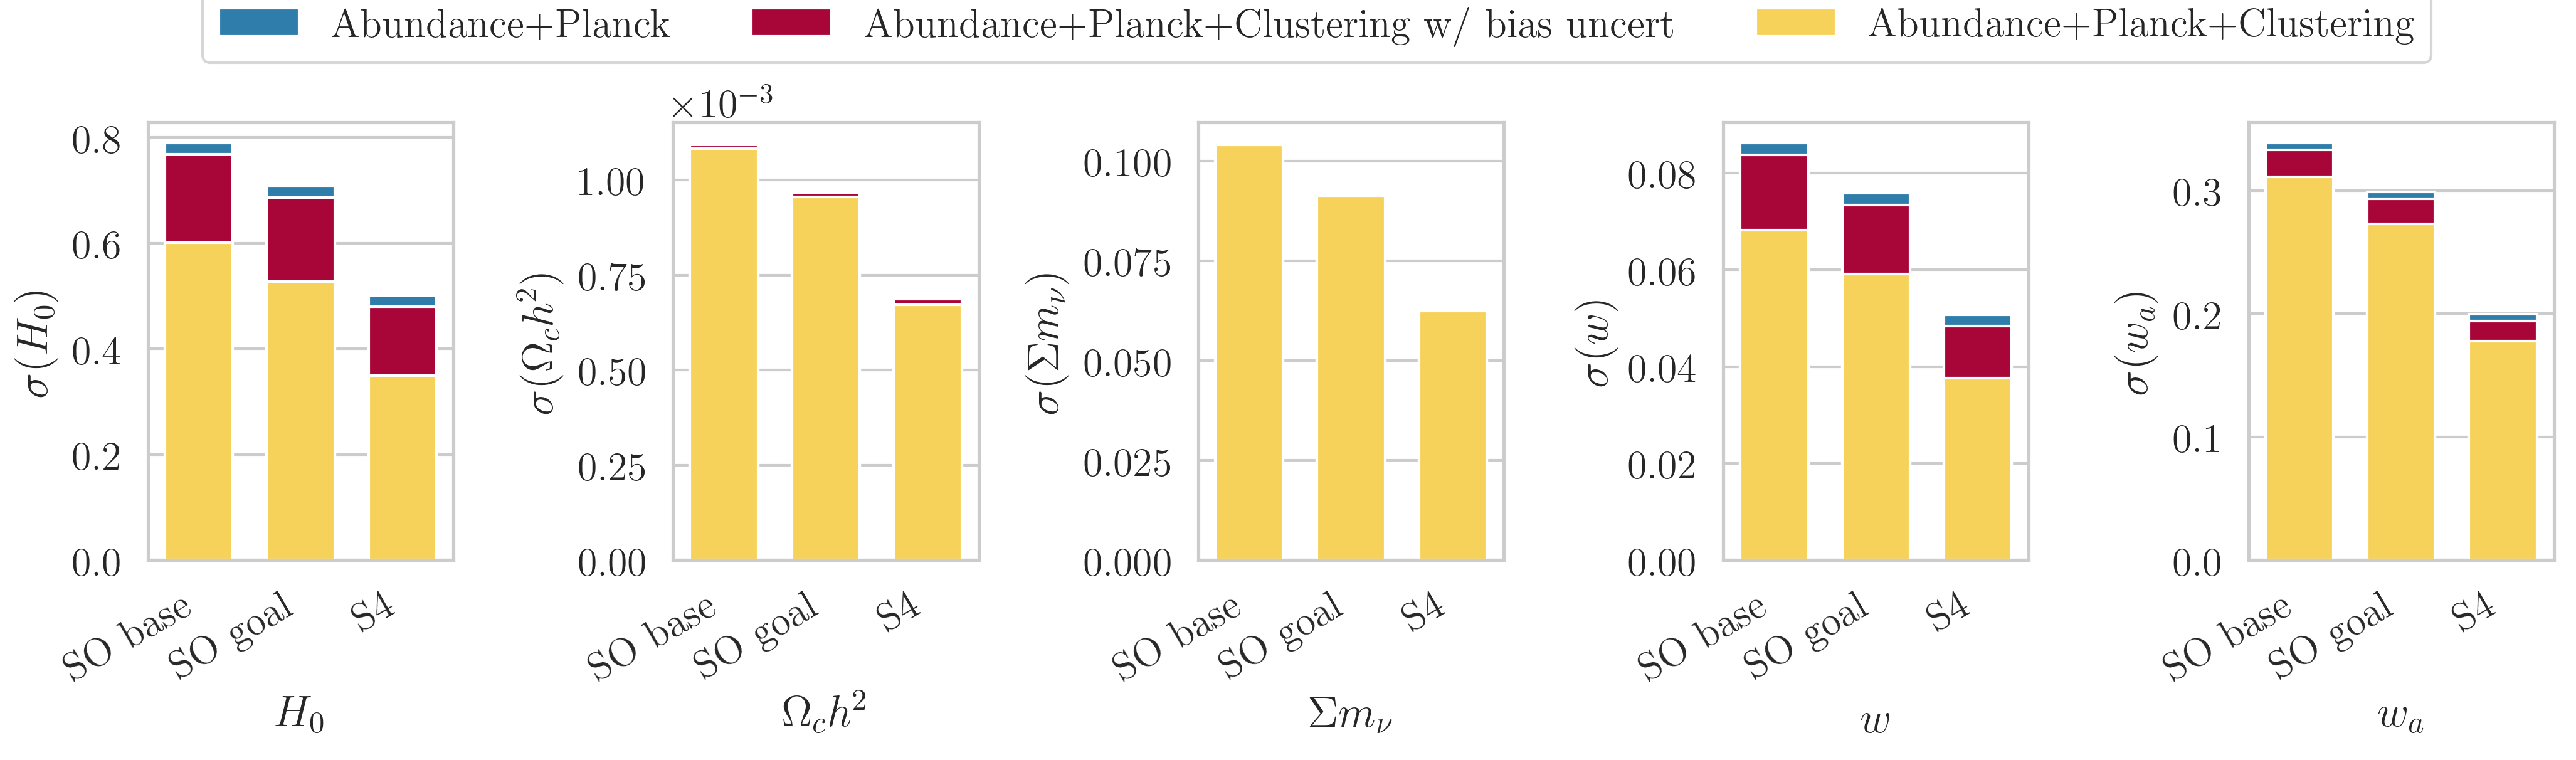

In [35]:
#Make barplot for paper fig
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(14, 4))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    wth = 1
    #sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    
    for fish_index in range(len(so_base_fisher_list)):
        axes[index].bar(0, so_base_constraint_list[fish_index][param], width=wth, 
                        label=fisher_labels[fish_index], color=colors[fish_index])
        
    for fish_index in range(len(so_goal_fisher_list)):
        axes[index].bar(1.5, so_goal_constraint_list[fish_index][param], width=wth, 
                        color=colors[fish_index])
                    
    for fish_index in range(len(s4_fisher_list)):
        axes[index].bar(3, s4_constraint_list[fish_index][param], width=wth, 
                        color=colors[fish_index])
        
    axes[index].set_xlabel(latex)
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5,3.0))
    axes[index].set_xticklabels(('SO base', 'SO goal', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 3 +(wth + wth/2)/2)
    axes[index].set_ylabel(r'$\sigma ('+latex_paramdict[param]+')$')
    axes[index].grid(False, axis='x')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig('barplot.pdf', bbox_inches='tight')

In [36]:
for exp,consts in zip(experiments, constraint_lists):
    print('--------------------')
    print(exp)
    print('--------------------')
    for param in ordered_params:
        if param == 'abias':
            sig_abias = consts[1]['abias']
            print(f'absolute constraint on abias is: {sig_abias}')
        else:
            get_improvement(param, consts)

--------------------
SO base
--------------------
omch2, Optimal: 1.33059359220562
omch2, Conservative: 0.3908054308181863
ombh2, Optimal: 0.38361149962398144
ombh2, Conservative: 0.1399111340385728
H0, Optimal: 23.848588003784588
H0, Conservative: 2.731350804330035
ns, Optimal: 0.21829935028467862
ns, Conservative: 0.19805756158979282
As, Optimal: 0.12798620421301532
As, Conservative: 0.12511160985554381
mnu, Optimal: 0.5152288805657435
mnu, Conservative: 0.2636683947299434
w0, Optimal: 20.827405593121064
w0, Conservative: 2.819911662799812
wa, Optimal: 8.11216928962507
wa, Conservative: 1.5845685561651557
alpha_ym, Optimal: 0.386603818804121
alpha_ym, Conservative: 0.07397767821758494
b_ym, Optimal: 13.603921669451358
b_ym, Conservative: 1.7988165087618135
beta_ym, Optimal: 0.3027928957993198
beta_ym, Conservative: 0.04294654521954655
gamma_ym, Optimal: 10.140715816809909
gamma_ym, Conservative: 1.267699436524794
Ysig, Optimal: 0.08227828479068222
Ysig, Conservative: 0.02762170491364

In [37]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+'/bin') 
from deeos_to_gamma import get_gamma_constraint

In [38]:
so_base_sigma_gammas = []
for fish in so_base_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    so_base_sigma_gammas.append(sig_gamma)
    
so_goal_sigma_gammas = []
for fish in so_goal_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    so_goal_sigma_gammas.append(sig_gamma)
    
s4_sigma_gammas = []
for fish in s4_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    s4_sigma_gammas.append(sig_gamma)

/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


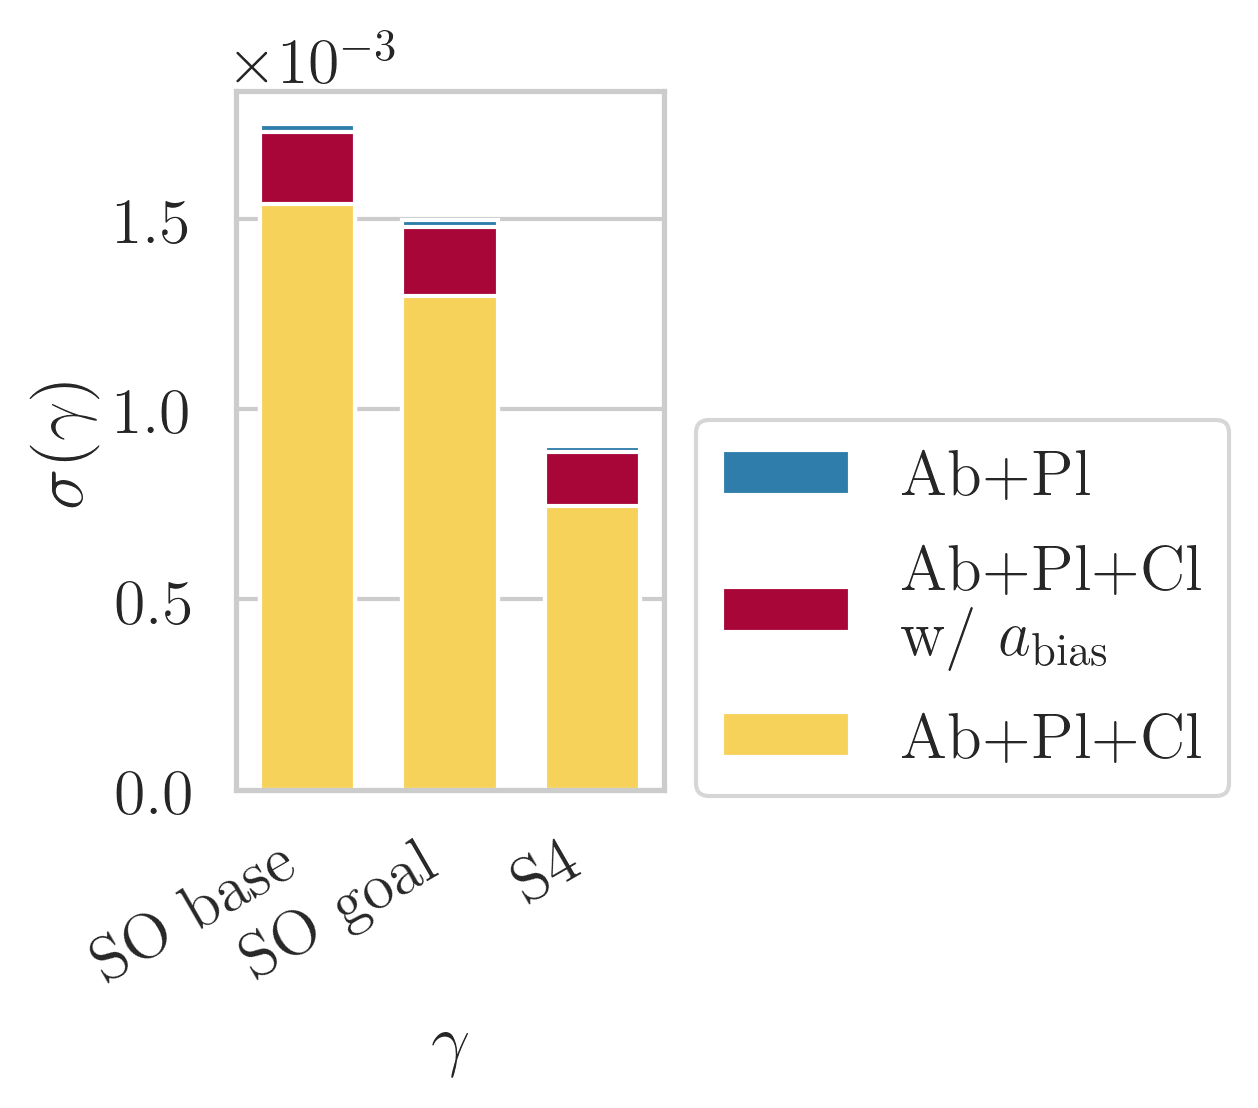

In [39]:
gamma_labels = ['Ab+Pl',
                'Ab+Pl+Cl'+'\n'+r'w/ $a_{\mathrm{bias}}$',
                'Ab+Pl+Cl']
wth = 1
for index,sigma_gamma in enumerate(so_base_sigma_gammas):
    plt.bar(0, sigma_gamma, width=1, label=gamma_labels[index],
            color=colors[index])
    
for index,sigma_gamma in enumerate(so_goal_sigma_gammas):
    plt.bar(1.5, sigma_gamma, width=1,
            color=colors[index])
    
for index,sigma_gamma in enumerate(s4_sigma_gammas):
    plt.bar(3, sigma_gamma, width=1,
            color=colors[index])
    
plt.xlabel(r'$\gamma$')
plt.xlim(-(wth + wth/2)/2 , 3 + (wth + wth/2)/2)
plt.ylabel(r'$\sigma(\gamma)$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.26))
plt.grid(False, axis='x')
plt.xticks([0,1.5,3.0], ['SO base', 'SO goal', 'S4'])

fig = plt.gcf()
fig.autofmt_xdate()
fig.set_size_inches(4.5,4)
fig.tight_layout()
fig.savefig('gamma_barplot.pdf', bbox_inches='tight')

In [40]:
#More numbers we quote in the abstract
gamma_lists = [so_base_sigma_gammas, so_goal_sigma_gammas, s4_sigma_gammas]

for exp,gammas in zip(experiments, gamma_lists):
    print(exp)
    print(f'optimal: {100*(1 - gammas[2]/gammas[0])}')
    print(f'conservative: {100*(1 - gammas[1]/gammas[0])}')

SO base
optimal: 12.059498546111646
conservative: 1.1718114282932124
SO goal
optimal: 13.407580342392789
conservative: 1.314528201546894
S4
optimal: 17.480276433954845
conservative: 1.784978055615949


In [41]:
from orphics.io import dict_from_section,list_from_config
Config = ConfigParser()
Config.optionxform=str
Config.read(INI)
clttfile = Config.get('general','clttfile')
constDict = dict_from_section(Config,'constants')

fparams = {}
for (key, val) in Config.items('params'):
    if ',' in val:
        param, step = val.split(',')
        fparams[key] = float(param)
    else:
        fparams[key] = float(val)

In [42]:
params_to_corner_plot = ['H0', 'ombh2', 'omch2', 'ns', 'mnu', 'w0', 'wa']
latex_to_corner_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_corner_plot]
latex_dict_corner={}
for ind,key in enumerate(params_to_corner_plot):
    latex_dict_corner[key] = latex_to_corner_plot[ind]

In [43]:
from orphics.stats import corner_plot

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily

Saved plot to paper_cornerplot_all.pdf


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz

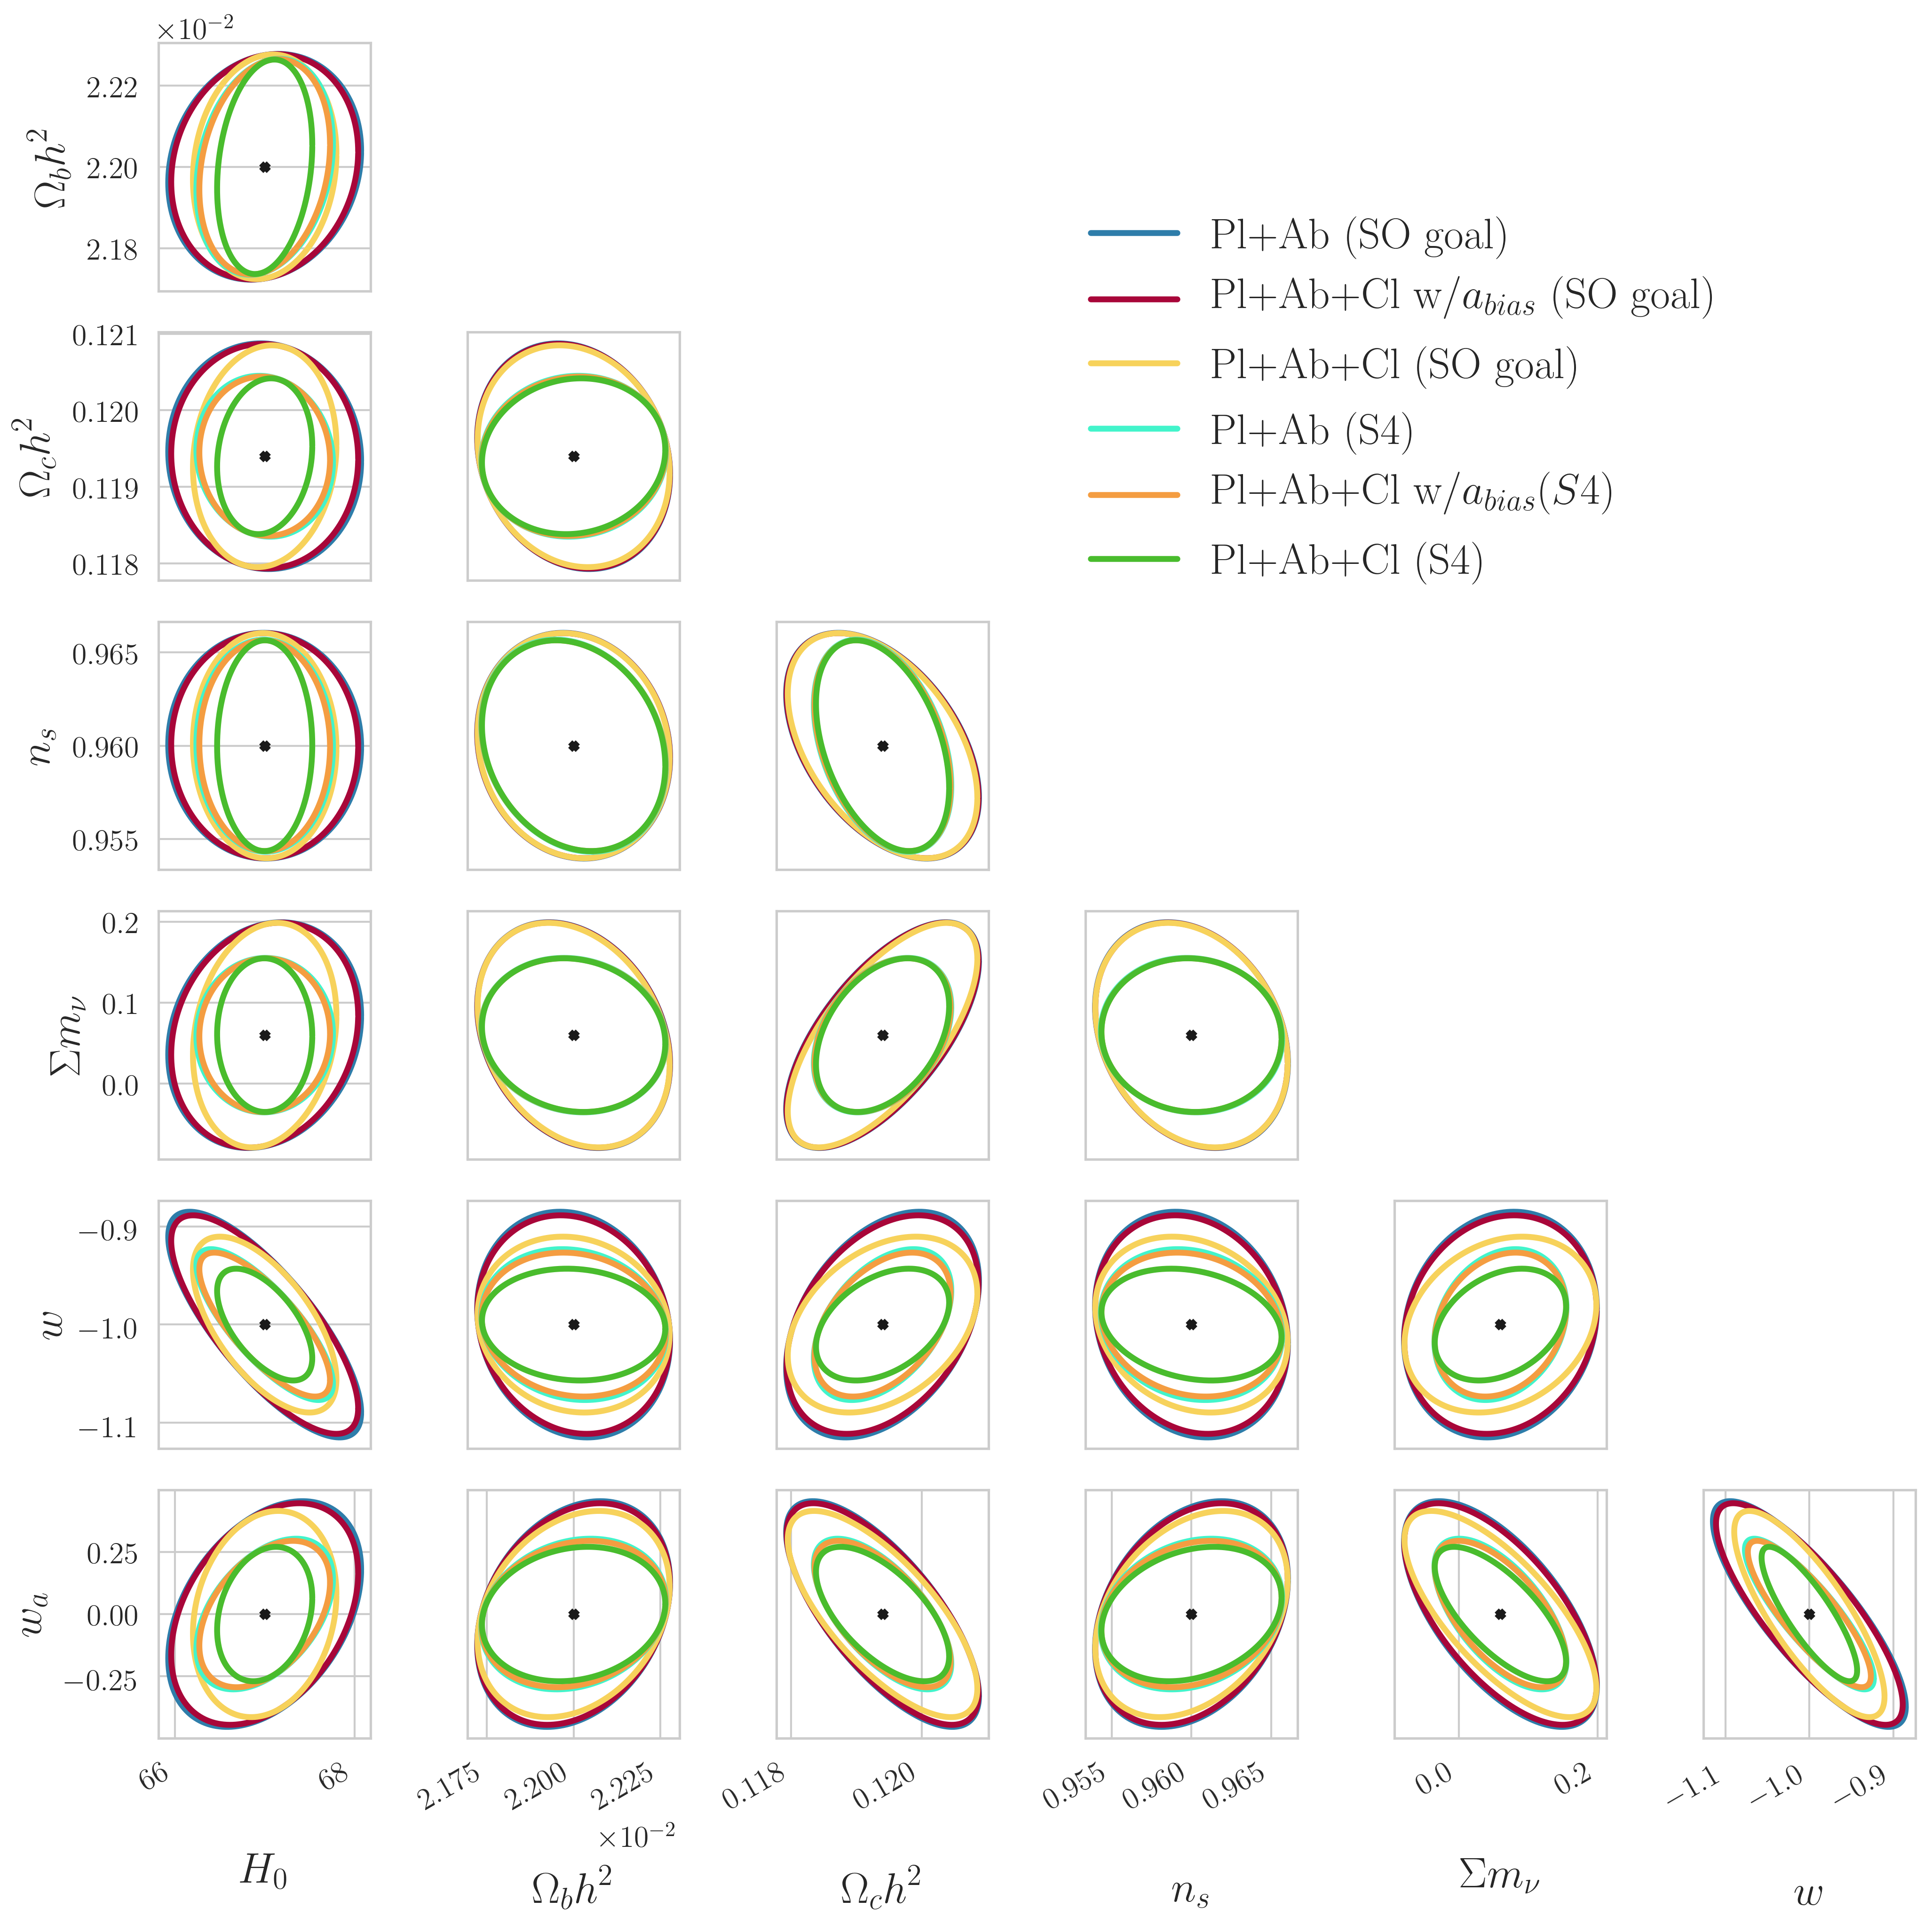

In [44]:
fishers_to_plot = so_goal_fisher_list + s4_fisher_list
corner_labels = ['Pl+Ab (SO goal)', r'Pl+Ab+Cl w/$a_{bias}$ (SO goal)', 'Pl+Ab+Cl (SO goal)',
                 'Pl+Ab (S4)', r'Pl+Ab+Cl w/$a_{bias} (S4)$', 'Pl+Ab+Cl (S4)']
corner_colors = ['#2e7daa','#a80639','#f7d25b', '#42f4cb', '#f49d41', '#49bc2d']
corner_plot(fishers_to_plot, corner_labels, colors=corner_colors, fid_dict=fparams, 
            params=params_to_corner_plot,
            show_1d=False, loc='upper right', latex_dict=latex_dict_corner, thk=3,
            labelsize=22, rotate_xlabels=True, xpad=30, save_file='paper_cornerplot_all.pdf',
            fileformat='pdf') 

In [45]:
def sigma_of_tau_prior(fisher, param, sigmatau):
    fisher_with_tau = fisher.copy()
    fisher_with_tau.add_prior('tau', sigmatau)
    sigma = fisher_with_tau.sigmas()[param]
    return sigma

In [46]:
sigma_taus = np.logspace(-3,-2, 30)
so_base_param = []
for fish in so_base_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_param = np.array([sigma_of_tau(st) for st in sigma_taus])
    
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    so_base_param.append((sigma_param, sigma_param_no_w, sigma_param_no_ww))
    
so_goal_param = []
for fish in so_goal_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_param = np.array([sigma_of_tau(st) for st in sigma_taus])
        
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    so_goal_param.append((sigma_param, sigma_param_no_w, sigma_param_no_ww))
    
s4_param = []
for fish in s4_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_param = np.array([sigma_of_tau(st) for st in sigma_taus])
    
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_param_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    s4_param.append((sigma_param, sigma_param_no_w, sigma_param_no_ww))

/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [47]:
sigma_labs = ['Ab+Pl: all extensions',
              r'Ab+Pl+Cl w/ $a_{\mathrm{bias}}$',
              'Ab+Pl+Cl']
sigma_labs_no_w = [r'$w_0$ and $\Sigma m_\nu$',
                   r' ',
                   r' ']
sigma_labs_no_ww = [r'$\Sigma m_\nu$ only',
                    r' ',
                    r' ']
sigma_styles = ['-', '--', ':']
colors_no_w = ['#42f4cb', '#f49d41', '#49bc2d']
colors_no_ww = ['#233c87','#dd68d4', '#7fc4af']
sigma_wths = [3, 3, 5]

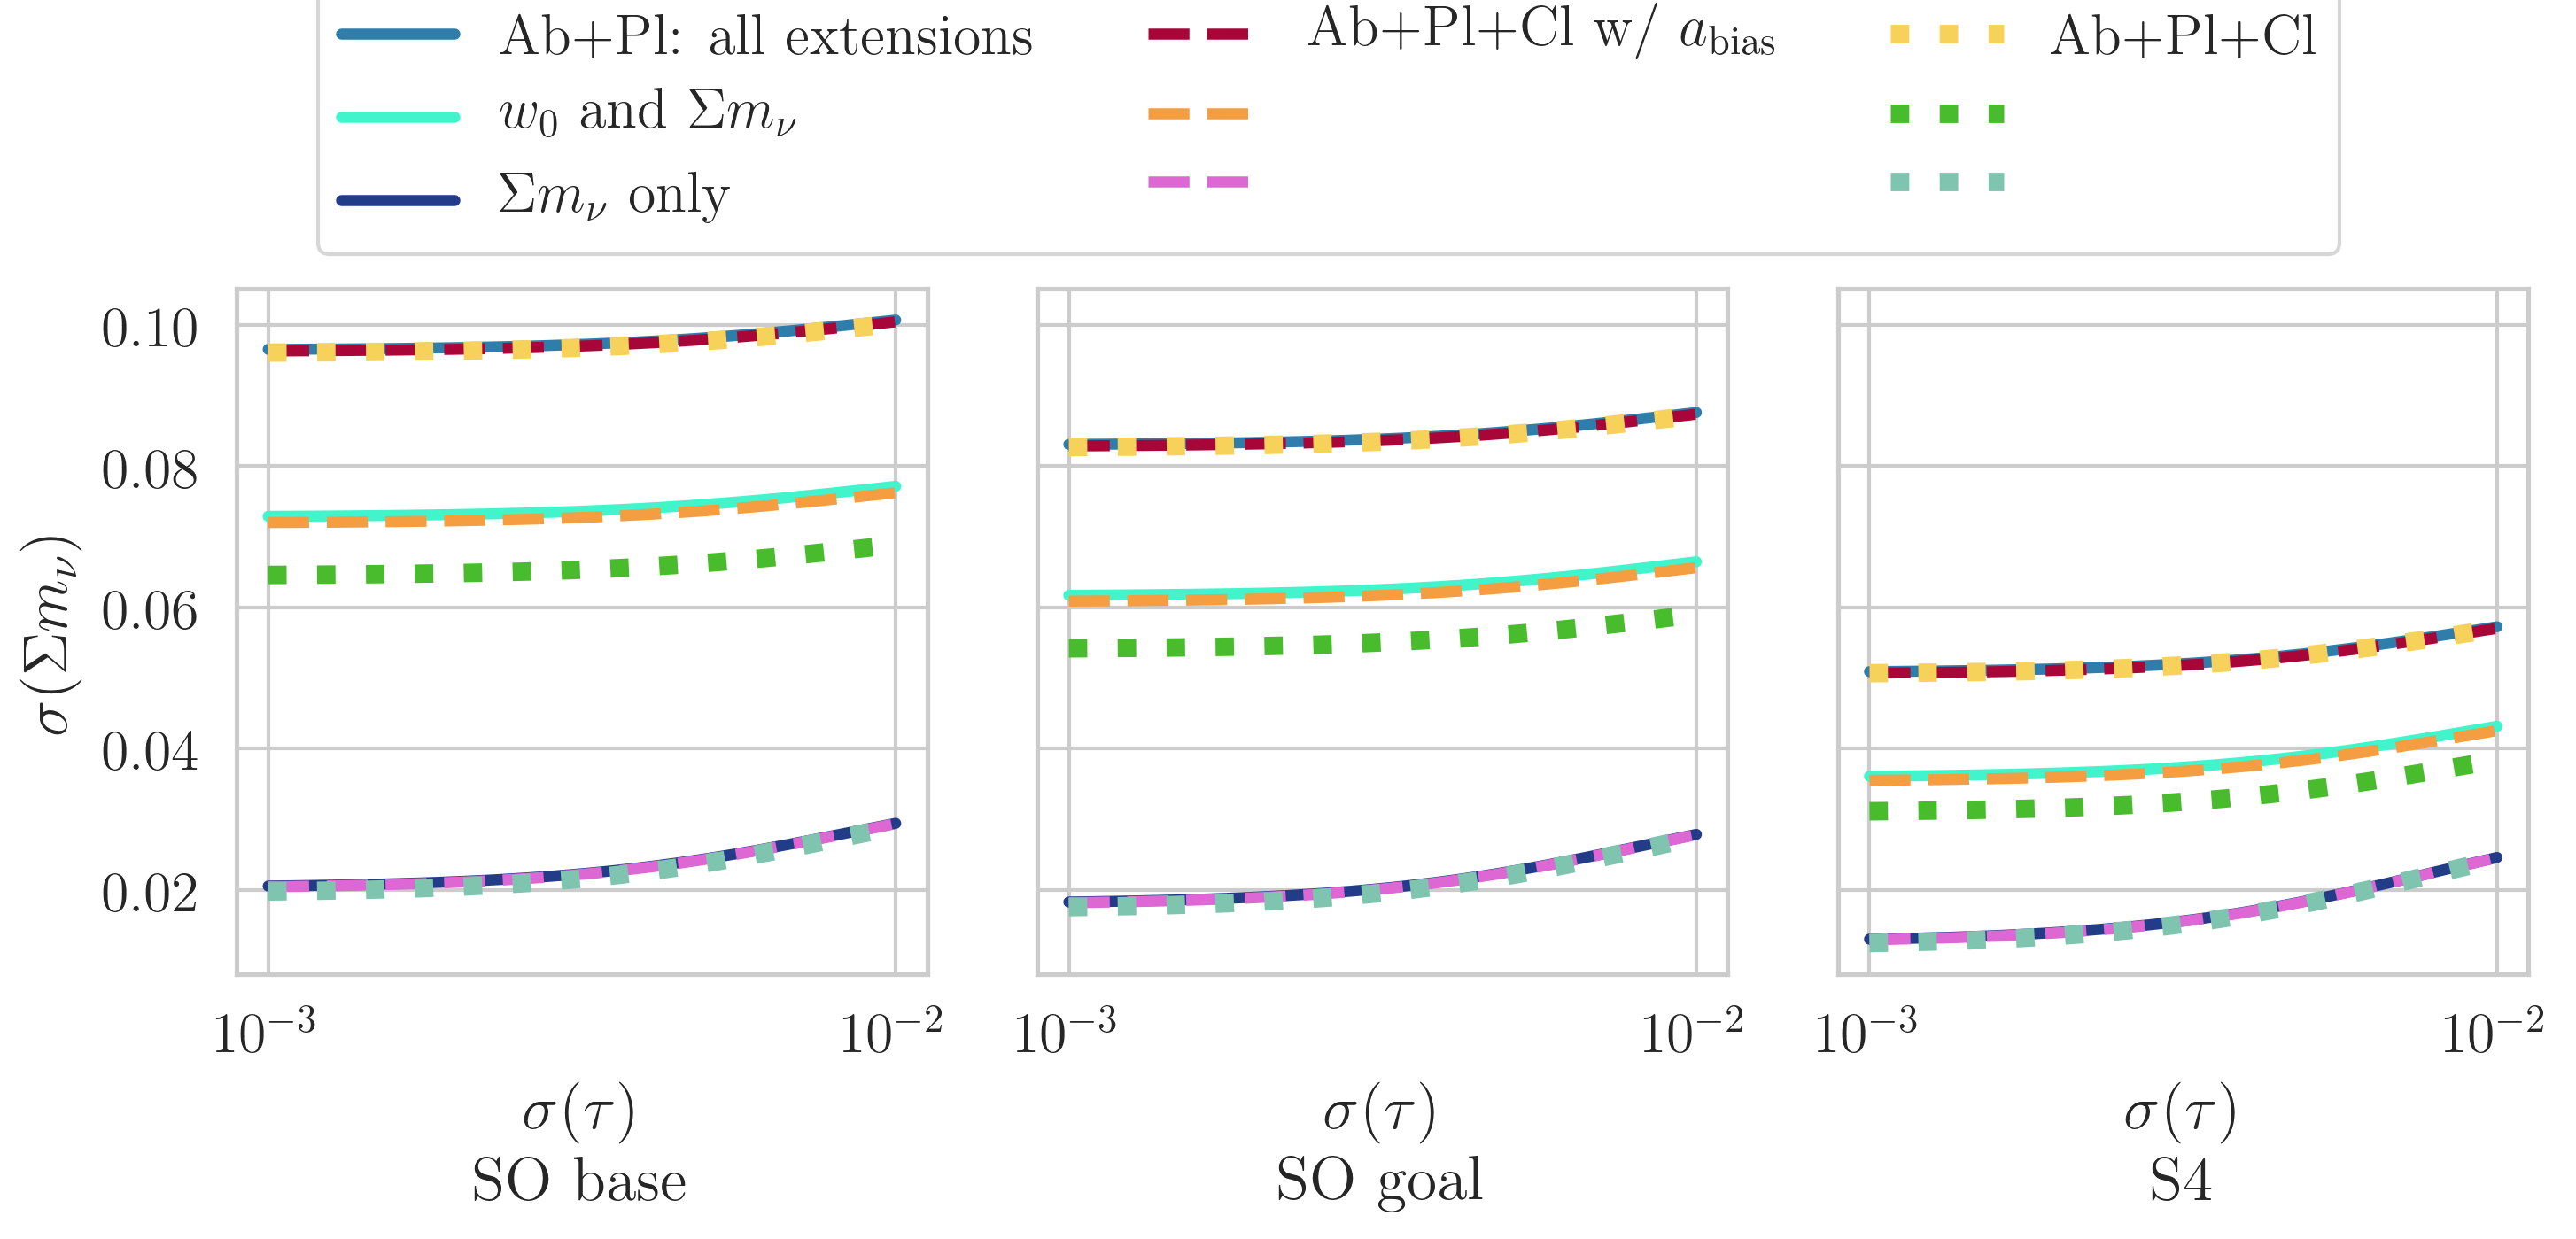

In [49]:
fig,axes = plt.subplots(1,3, sharey=True)

for findex,tup in enumerate(so_base_param):
    sigma_param, sigma_param_no_w, sigma_param_no_ww = tup
    axes[0].plot(sigma_taus, sigma_param, label=sigma_labs[findex], color=colors[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[0].plot(sigma_taus, sigma_param_no_w, label=sigma_labs_no_w[findex], 
                 color=colors_no_w[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[0].plot(sigma_taus, sigma_param_no_ww, label=sigma_labs_no_ww[findex], 
                 color=colors_no_ww[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
axes[0].set_xlabel(r'$\sigma(\tau)$' + '\nSO base')
axes[0].set_ylabel(r'$\sigma(\Sigma m_\nu)$')
axes[0].set_xscale('log')
#axes[0].set_yscale('log')
#axes[0].set_xticks((1e-3,1e-2,1e-1))

for findex,tup in enumerate(so_goal_param):
    sigma_param, sigma_param_no_w, sigma_param_no_ww = tup
    axes[1].plot(sigma_taus, sigma_param, label=sigma_labs[findex], color=colors[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[1].plot(sigma_taus, sigma_param_no_w, label=sigma_labs_no_w[findex], color=colors_no_w[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[1].plot(sigma_taus, sigma_param_no_ww, label=sigma_labs_no_ww[findex], 
                 color=colors_no_ww[findex], linestyle=sigma_styles[findex], 
                 linewidth=sigma_wths[findex])
axes[1].set_xlabel(r'$\sigma(\tau)$' + '\nSO goal')
axes[1].set_xscale('log')
#axes[1].set_yscale('log')

for findex,tup in enumerate(s4_param):
    sigma_param, sigma_param_no_w, sigma_param_no_ww = tup
    axes[2].plot(sigma_taus, sigma_param, label=sigma_labs[findex], color=colors[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[2].plot(sigma_taus, sigma_param_no_w, label=sigma_labs_no_w[findex], color=colors_no_w[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
    axes[2].plot(sigma_taus, sigma_param_no_ww, label=sigma_labs_no_ww[findex], 
                 color=colors_no_ww[findex], linestyle=sigma_styles[findex], 
                 linewidth=sigma_wths[findex])
axes[2].set_xlabel(r'$\sigma(\tau)$' + '\nS4')
axes[2].set_xscale('log')
#axes[2].set_yscale('log')

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.set_size_inches(10,4)
fig.tight_layout()
#fig.savefig('mnu_of_tau.pdf', bbox_inches='tight')

In [50]:
def fom(fisher, fom_params):
    fisher_params = fisher.params
    cov = FisherMatrix(np.linalg.inv(fisher.values), fisher_params)
    
    excluded_params = set(fisher_params) - set(fom_params)
    for par in excluded_params:
        cov.delete(par)
        
    return 1/np.sqrt(np.linalg.det(cov.values))
    

In [51]:
param_pairs = [['w0', 'wa'], ['w0', 'mnu'], ['mnu', 'wa']]
fish_lists = [so_base_fisher_barplot_list, so_goal_fisher_barplot_list, s4_fisher_barplot_list]
for exp,fish in zip(experiments, fish_lists):
    print('--------------------')
    print(exp)
    print('--------------------')
    for param_pair in param_pairs:
        fom1 = fom(fish[0], param_pair)
        fom2 = fom(fish[1], param_pair)
        fom3 = fom(fish[2], param_pair)

        print(f'{param_pair}, conservative: {100*(fom2/fom1 - 1)}')
        print(f'{param_pair}, maximal: {100*(fom3/fom1 - 1)}')

--------------------
SO base
--------------------
['w0', 'wa'], conservative: 3.357095964419865
['w0', 'wa'], maximal: 30.23832598202183
['w0', 'mnu'], conservative: 3.2157944960922613
['w0', 'mnu'], maximal: 28.473744836934213
['mnu', 'wa'], conservative: 2.8059263479723207
['mnu', 'wa'], maximal: 21.25368971271133
--------------------
SO goal
--------------------


/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


['w0', 'wa'], conservative: 3.7994311481988507
['w0', 'wa'], maximal: 33.33383816503051
['w0', 'mnu'], conservative: 3.638534536482907
['w0', 'mnu'], maximal: 31.10916743316978
['mnu', 'wa'], conservative: 3.1272013083050387
['mnu', 'wa'], maximal: 22.35049395769353
--------------------
S4
--------------------
['w0', 'wa'], conservative: 5.552686018915787
['w0', 'wa'], maximal: 44.202917911328335
['w0', 'mnu'], conservative: 5.325919907066834
['w0', 'mnu'], maximal: 39.66538639109307
['mnu', 'wa'], conservative: 4.331778363233596
['mnu', 'wa'], maximal: 24.316993864732094


In [52]:
nuis_params = ['b_ym', 'alpha_ym', 'Ysig', 'gamma_ym', 'beta_ym', 'gammaYsig', 'betaYsig']
nuis1 = fom(s4_fisher_barplot_list[0], nuis_params)
nuis2 = fom(s4_fisher_barplot_list[1], nuis_params)
nuis3 = fom(s4_fisher_barplot_list[2], nuis_params)

print(nuis2/nuis1)
print(nuis3/nuis1)

1.056172024347021
1.4837880431423192


In [53]:
extension_params = ['mnu', 'w0', 'wa']
nuissance_params = ['b_ym', 'alpha_ym', 'Ysig', 'gamma_ym', 'beta_ym', 'gammaYsig', 'betaYsig']
cosmo_params = ['H0', 'omch2', 'ombh2', 'As', 'ns']

so_base_extension_foms = [fom(fish, extension_params) for fish in so_base_fisher_barplot_list]
so_goal_extension_foms = [fom(fish, extension_params) for fish in so_goal_fisher_barplot_list]
s4_extension_foms = [fom(fish, extension_params) for fish in s4_fisher_barplot_list]

so_base_nuissance_foms = [fom(fish, nuissance_params) for fish in so_base_fisher_barplot_list]
so_goal_nuissance_foms = [fom(fish, nuissance_params) for fish in so_goal_fisher_barplot_list]
s4_nuissance_foms = [fom(fish, nuissance_params) for fish in s4_fisher_barplot_list]

so_base_cosmo_foms = [fom(fish, cosmo_params) for fish in so_base_fisher_barplot_list]
so_goal_cosmo_foms = [fom(fish, cosmo_params) for fish in so_goal_fisher_barplot_list]
s4_cosmo_foms = [fom(fish, cosmo_params) for fish in s4_fisher_barplot_list]

In [54]:
def get_fom_improvement(fom_list, paramspace):
    print(f'{paramspace}, optimal: {100 * (fom_list[2]/fom_list[0] - 1)}')
    print(f'{paramspace}, conservative: {100 * (fom_list[1]/fom_list[0] - 1)}')

In [55]:
param_spaces = ['extensions', 'nuissance', 'LCDM']
so_base_foms = {'extensions':so_base_extension_foms, 'nuissance':so_base_nuissance_foms, 
           'LCDM':so_base_cosmo_foms}
so_goal_foms = {'extensions':so_goal_extension_foms, 'nuissance':so_goal_nuissance_foms, 
           'LCDM':so_goal_cosmo_foms}
s4_foms = {'extensions':s4_extension_foms, 'nuissance':s4_nuissance_foms, 
           'LCDM':s4_cosmo_foms}
fom_dicts = [so_base_foms, so_goal_foms, s4_foms]

for exp,fom_dict in zip(experiments, fom_dicts):
    print('--------------------')
    print(exp)
    print('--------------------')
    for par in param_spaces: 
        get_fom_improvement(fom_dict[par], par)

--------------------
SO base
--------------------
extensions, optimal: 31.629574225342093
extensions, conservative: 3.481321417398564
nuissance, optimal: 33.123588281847496
nuissance, conservative: 3.306089456896655
LCDM, optimal: 35.14228221666469
LCDM, conservative: 3.632492801542253
--------------------
SO goal
--------------------
extensions, optimal: 34.56173366041351
extensions, conservative: 3.9223151565727754
nuissance, optimal: 36.534694611446184
nuissance, conservative: 3.7575092533640886
LCDM, optimal: 39.22375075869044
LCDM, conservative: 4.221553860078209
--------------------
S4
--------------------
extensions, optimal: 45.08056937492524
extensions, conservative: 5.742391693616056
nuissance, optimal: 48.378804314231914
nuissance, conservative: 5.6172024347020955
LCDM, optimal: 54.55064959878908
LCDM, conservative: 6.833365251595103


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


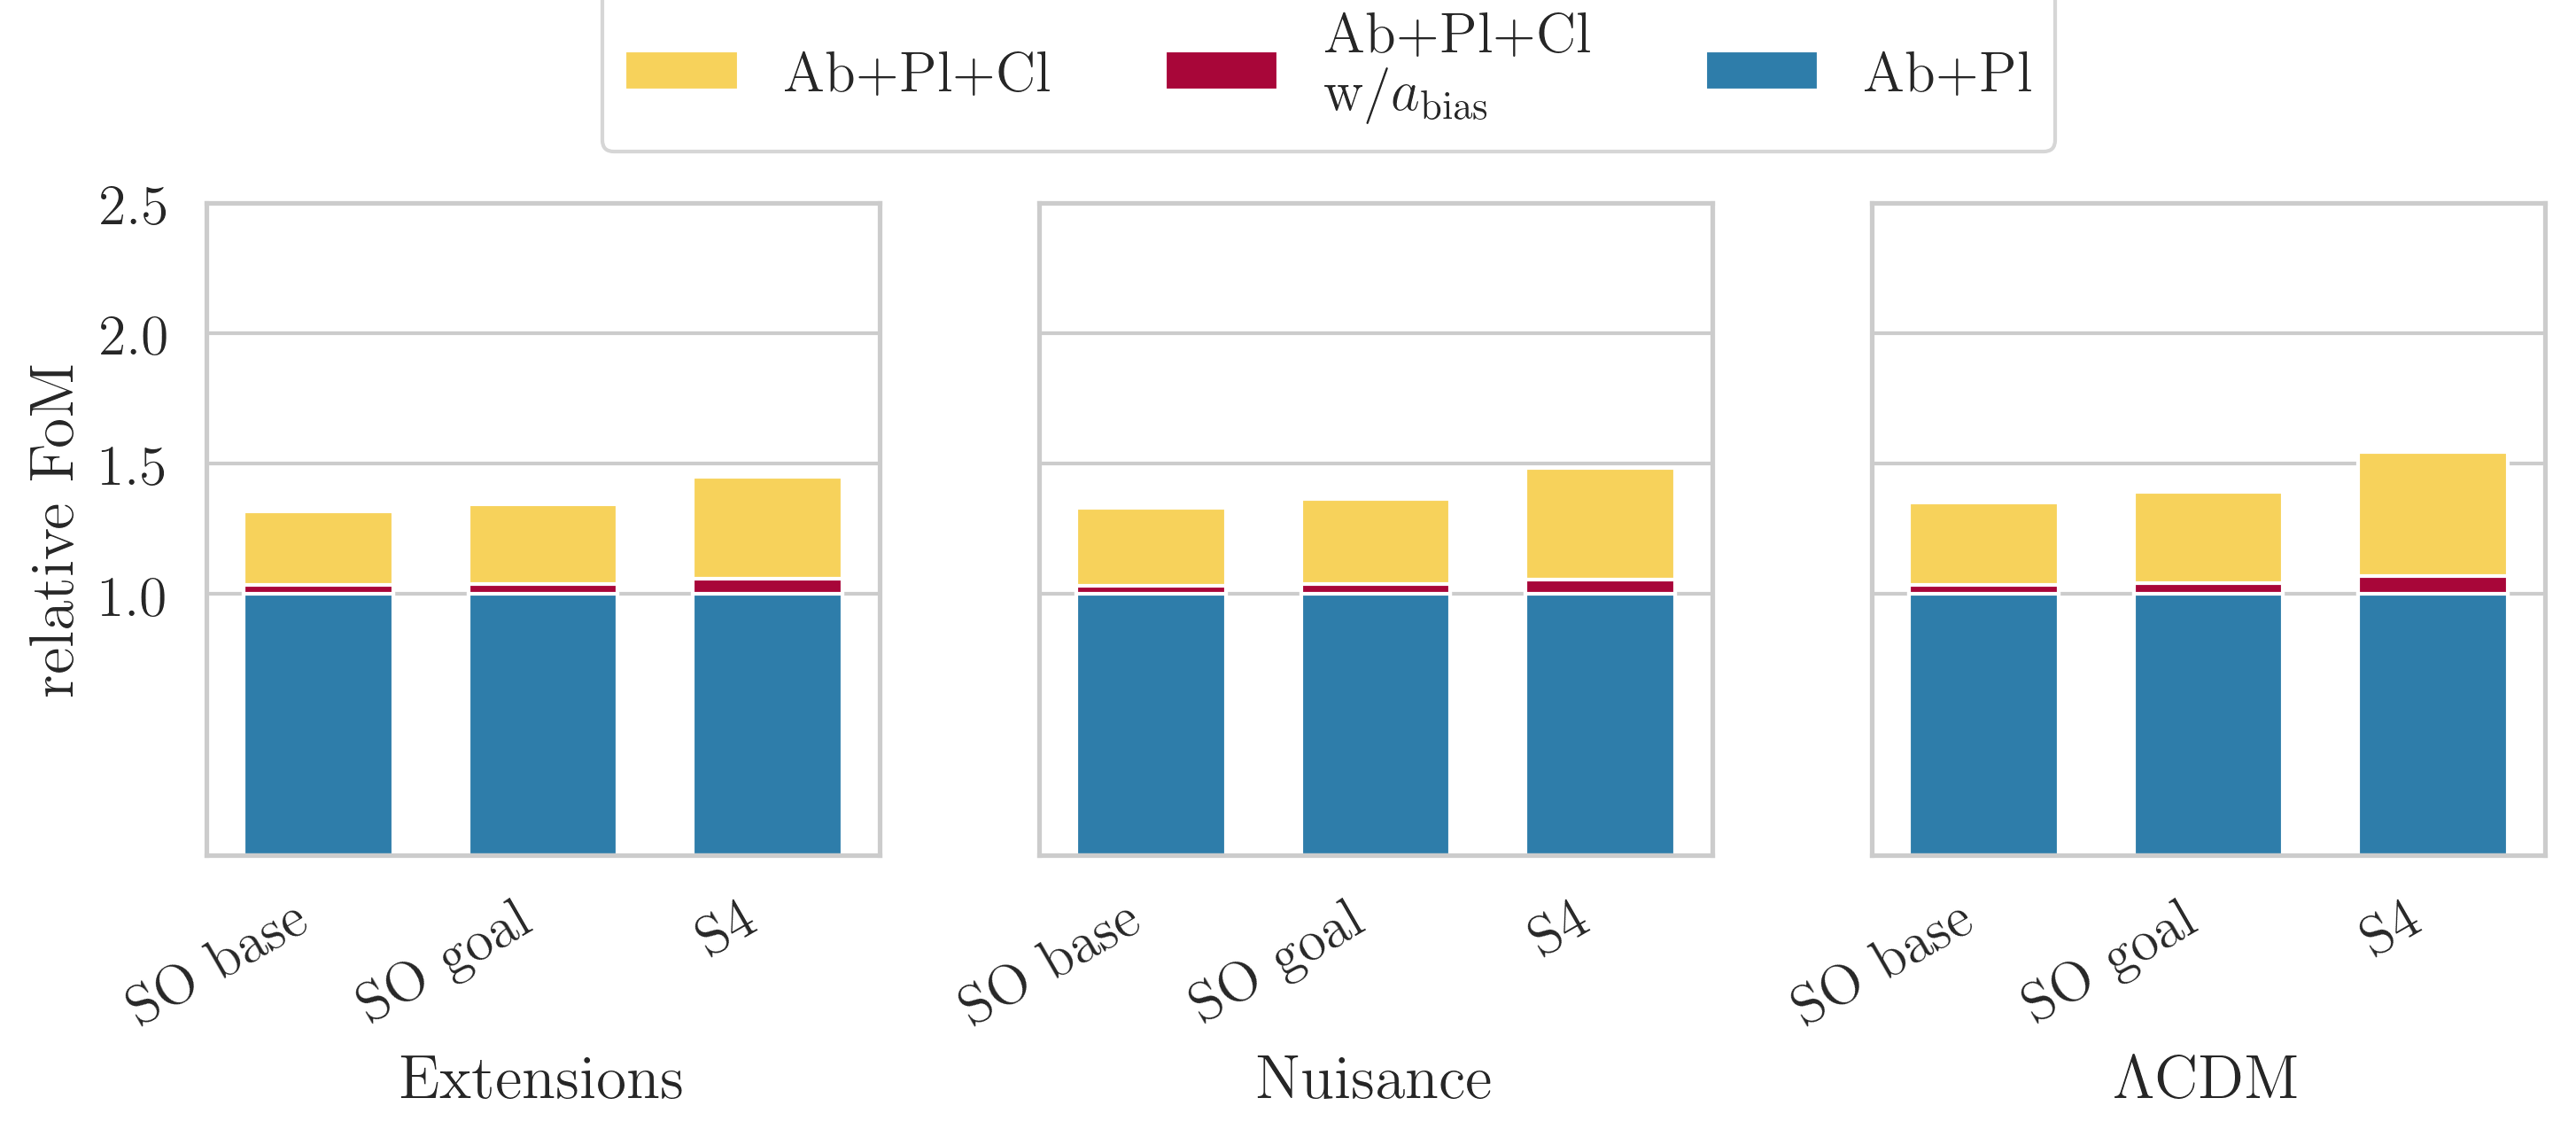

In [60]:
fig,axes = plt.subplots(1, 3, sharey=True)

#EXTENSIONS
so_base_ext_ratio_abias = so_base_extension_foms[1]/so_base_extension_foms[0]
so_base_ext_ratio = so_base_extension_foms[2]/so_base_extension_foms[0]
axes[0].bar(0, so_base_ext_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[0].bar(0, so_base_ext_ratio_abias, width=wth, color=colors[1], label='Ab+Pl+Cl \n w/ abias')
axes[0].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_ext_ratio_abias = so_goal_extension_foms[1]/so_goal_extension_foms[0]
so_goal_ext_ratio = so_goal_extension_foms[2]/so_goal_extension_foms[0]
axes[0].bar(1.5, so_goal_ext_ratio, width=wth, color=colors[2])
axes[0].bar(1.5, so_goal_ext_ratio_abias, width=wth, color=colors[1])
axes[0].bar(1.5, 1, width=wth, color=colors[0])

s4_ext_ratio_abias = s4_extension_foms[1]/s4_extension_foms[0]
s4_ext_ratio = s4_extension_foms[2]/s4_extension_foms[0]
axes[0].bar(3, s4_ext_ratio, width=wth, color=colors[2])
axes[0].bar(3, s4_ext_ratio_abias, width=wth, color=colors[1])
axes[0].bar(3, 1, width=wth, color=colors[0])

axes[0].set_ylabel(r'relative FoM')

#NUISSANCE
so_base_nuis_ratio_abias = so_base_nuissance_foms[1]/so_base_nuissance_foms[0]
so_base_nuis_ratio = so_base_nuissance_foms[2]/so_base_nuissance_foms[0]
axes[1].bar(0, so_base_nuis_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[1].bar(0, so_base_nuis_ratio_abias, width=wth, color=colors[1], label='Ab+Pl+Cl \n w/ abias')
axes[1].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_nuis_ratio_abias = so_goal_nuissance_foms[1]/so_goal_nuissance_foms[0]
so_goal_nuis_ratio = so_goal_nuissance_foms[2]/so_goal_nuissance_foms[0]
axes[1].bar(1.5, so_goal_nuis_ratio, width=wth, color=colors[2])
axes[1].bar(1.5, so_goal_nuis_ratio_abias, width=wth, color=colors[1])
axes[1].bar(1.5, 1, width=wth, color=colors[0])

s4_nuis_ratio_abias = s4_nuissance_foms[1]/s4_nuissance_foms[0]
s4_nuis_ratio = s4_nuissance_foms[2]/s4_nuissance_foms[0]
axes[1].bar(3, s4_nuis_ratio, width=wth, color=colors[2])
axes[1].bar(3, s4_nuis_ratio_abias, width=wth, color=colors[1])
axes[1].bar(3, 1, width=wth, color=colors[0])

#COSMOLOGICAL
so_base_cos_ratio_abias = so_base_cosmo_foms[1]/so_base_cosmo_foms[0]
so_base_cos_ratio = so_base_cosmo_foms[2]/so_base_cosmo_foms[0]
axes[2].bar(0, so_base_cos_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[2].bar(0, so_base_cos_ratio_abias, width=wth, color=colors[1], 
            label='Ab+Pl+Cl \n w/' + r'$a_\mathrm{bias}$')
axes[2].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_cos_ratio_abias = so_goal_cosmo_foms[1]/so_goal_cosmo_foms[0]
so_goal_cos_ratio = so_goal_cosmo_foms[2]/so_goal_cosmo_foms[0]
axes[2].bar(1.5, so_goal_cos_ratio, width=wth, color=colors[2])
axes[2].bar(1.5, so_goal_cos_ratio_abias, width=wth, color=colors[1])
axes[2].bar(1.5, 1, width=wth, color=colors[0])

s4_cos_ratio_abias = s4_cosmo_foms[1]/s4_cosmo_foms[0]
s4_cos_ratio = s4_cosmo_foms[2]/s4_cosmo_foms[0]
axes[2].bar(3, s4_cos_ratio, width=wth, color=colors[2])
axes[2].bar(3, s4_cos_ratio_abias, width=wth, color=colors[1])
axes[2].bar(3, 1, width=wth, color=colors[0])

fom_labels = [r'Extensions', 'Nuisance', r'$\Lambda$CDM']
for index in range(3):
    axes[index].set_xlabel(fom_labels[index])
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5,3.0))
    axes[index].set_xticklabels(('SO base', 'SO goal', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 3 +(wth + wth/2)/2)
    axes[index].grid(False, axis='x')
    axes[index].set_yticks((1,1.5,2,2.5))

    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.autofmt_xdate()
fig.set_size_inches(10,4)
fig.tight_layout()
fig.savefig('fom_plot.pdf', bbox_inches='tight')

In [57]:
def sigma_of_abias_prior(fisher, param, sigma_abias):
    fisher_with_abias = fisher.copy()
    fisher_with_abias.add_prior('abias', sigma_abias)
    sigma = fisher_with_abias.sigmas()[param]
    return sigma

In [58]:
sigma_abiass = np.logspace(-4, 0, 30)
#sigma_abiass = np.linspace(1e-4, 1e-1, 30)

so_base_param = []
fish = so_base_fisher_barplot_list[1]
sigma_of_abias = lambda sigmaabias: sigma_of_abias_prior(fish, 'H0', sigmaabias)
sigma_param = np.array([sigma_of_abias(st) for st in sigma_abiass])
so_base_param.append(sigma_param)

so_goal_param = []
fish = so_goal_fisher_barplot_list[1]
sigma_of_abias = lambda sigmaabias: sigma_of_abias_prior(fish, 'H0', sigmaabias)
sigma_param = np.array([sigma_of_abias(st) for st in sigma_abiass])
so_goal_param.append(sigma_param)

s4_param = []
fish = s4_fisher_barplot_list[1]
sigma_of_abias = lambda sigmaabias: sigma_of_abias_prior(fish, 'H0', sigmaabias)
sigma_param = np.array([sigma_of_abias(st) for st in sigma_abiass])
s4_param.append(sigma_param)

/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [59]:
sigma_labs = ['SO base',
              'SO goal',
              'S4']
sigma_labs_no_w = [r'$w_0$ and $\Sigma m_\nu$',
                   r' ',
                   r' ']
sigma_labs_no_ww = [r'$\Sigma m_\nu$ only',
                    r' ',
                    r' ']
sigma_styles = ['-', '--', ':']
colors_no_w = ['#42f4cb', '#f49d41', '#49bc2d']
colors_no_ww = ['#233c87','#dd68d4', '#7fc4af']
sigma_wths = [3, 3, 5]

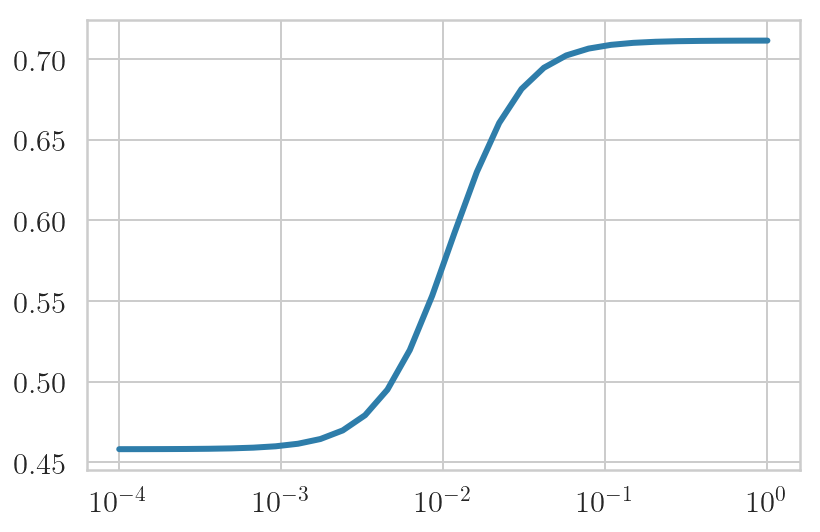

In [43]:
fig,axes = plt.subplots(1,1, sharey=True)

for findex,sigma_param in enumerate(so_base_param):
    axes.plot(sigma_abiass, sigma_param, label=sigma_labs[findex], color=colors[findex],
                 linestyle=sigma_styles[findex], linewidth=sigma_wths[findex])
#axes.set_xlabel(r'$\sigma(abias)$' + '\nS4')
axes.set_xscale('log')
#axes[2].set_yscale('log')

handles, labels = axes.get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.set_size_inches(6,4)
fig.tight_layout()
#fig.savefig('mnu_of_abias.eps', bbox_inches='tight')

In [61]:
extension_params = ['mnu', 'w0', 'wa']
nuissance_params = ['b_ym', 'alpha_ym', 'Ysig', 'gamma_ym', 'beta_ym', 'gammaYsig', 'betaYsig']
cosmo_params = ['H0', 'omch2', 'ombh2', 'As', 'ns']
param_space_dict = {'extensions':extension_params, 'nuissance':nuissance_params,
                    'LCDM':cosmo_params}

def fom_of_abias(fisher, sigma_abiases):
    fishers_of_prior = []
    for sab in sigma_abiases:
        fisher_with_abias = fisher.copy()
        fisher_with_abias.add_prior('abias', sab)
        fishers_of_prior.append(fisher_with_abias)
    
    ext_foms = np.array([fom(fish, param_space_dict['extensions']) for fish in fishers_of_prior])
    nuis_foms = np.array([fom(fish, param_space_dict['nuissance']) for fish in fishers_of_prior])
    lcdm_foms = np.array([fom(fish, param_space_dict['LCDM']) for fish in fishers_of_prior])
    
    fom_dict = {'extensions':ext_foms, 'nuissance':nuis_foms,
                    'LCDM':lcdm_foms}
    return fom_dict

In [62]:
labs = ['Ab+Pl',
        r'Ab+Pl+Cl w/ $a_{\mathrm{bias}}$',
        'Ab+Pl+Cl']

sigma_abs = np.logspace(-4, -1, 30)
#so_base_param

so_base_ab_fomdict = fom_of_abias(so_base_fisher_barplot_list[1], sigma_abs)

so_goal_ab_fomdict = fom_of_abias(so_goal_fisher_barplot_list[1], sigma_abs)

s4_ab_fomdict = fom_of_abias(s4_fisher_barplot_list[1], sigma_abs)

/Users/dylan/Development/orphics/orphics/stats.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [63]:
meta_fom_list = [so_base_ab_fomdict, so_goal_ab_fomdict, s4_ab_fomdict]
so_base_noclust_fomdict = {'extensions':so_base_foms['extensions'][0], 
                           'nuissance':so_base_foms['nuissance'][0],
                           'LCDM':so_base_foms['LCDM'][0]}

so_goal_noclust_fomdict = {'extensions':so_goal_foms['extensions'][0], 
                           'nuissance':so_goal_foms['nuissance'][0],
                           'LCDM':so_goal_foms['LCDM'][0]}

s4_noclust_fomdict = {'extensions':s4_foms['extensions'][0], 
                      'nuissance':s4_foms['nuissance'][0],
                      'LCDM':s4_foms['LCDM'][0]}
meta_noclust_list = [so_base_noclust_fomdict, so_goal_noclust_fomdict, s4_noclust_fomdict]

In [64]:
param_space_colors = ['#30599b', '#cc353c', '#659955']

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


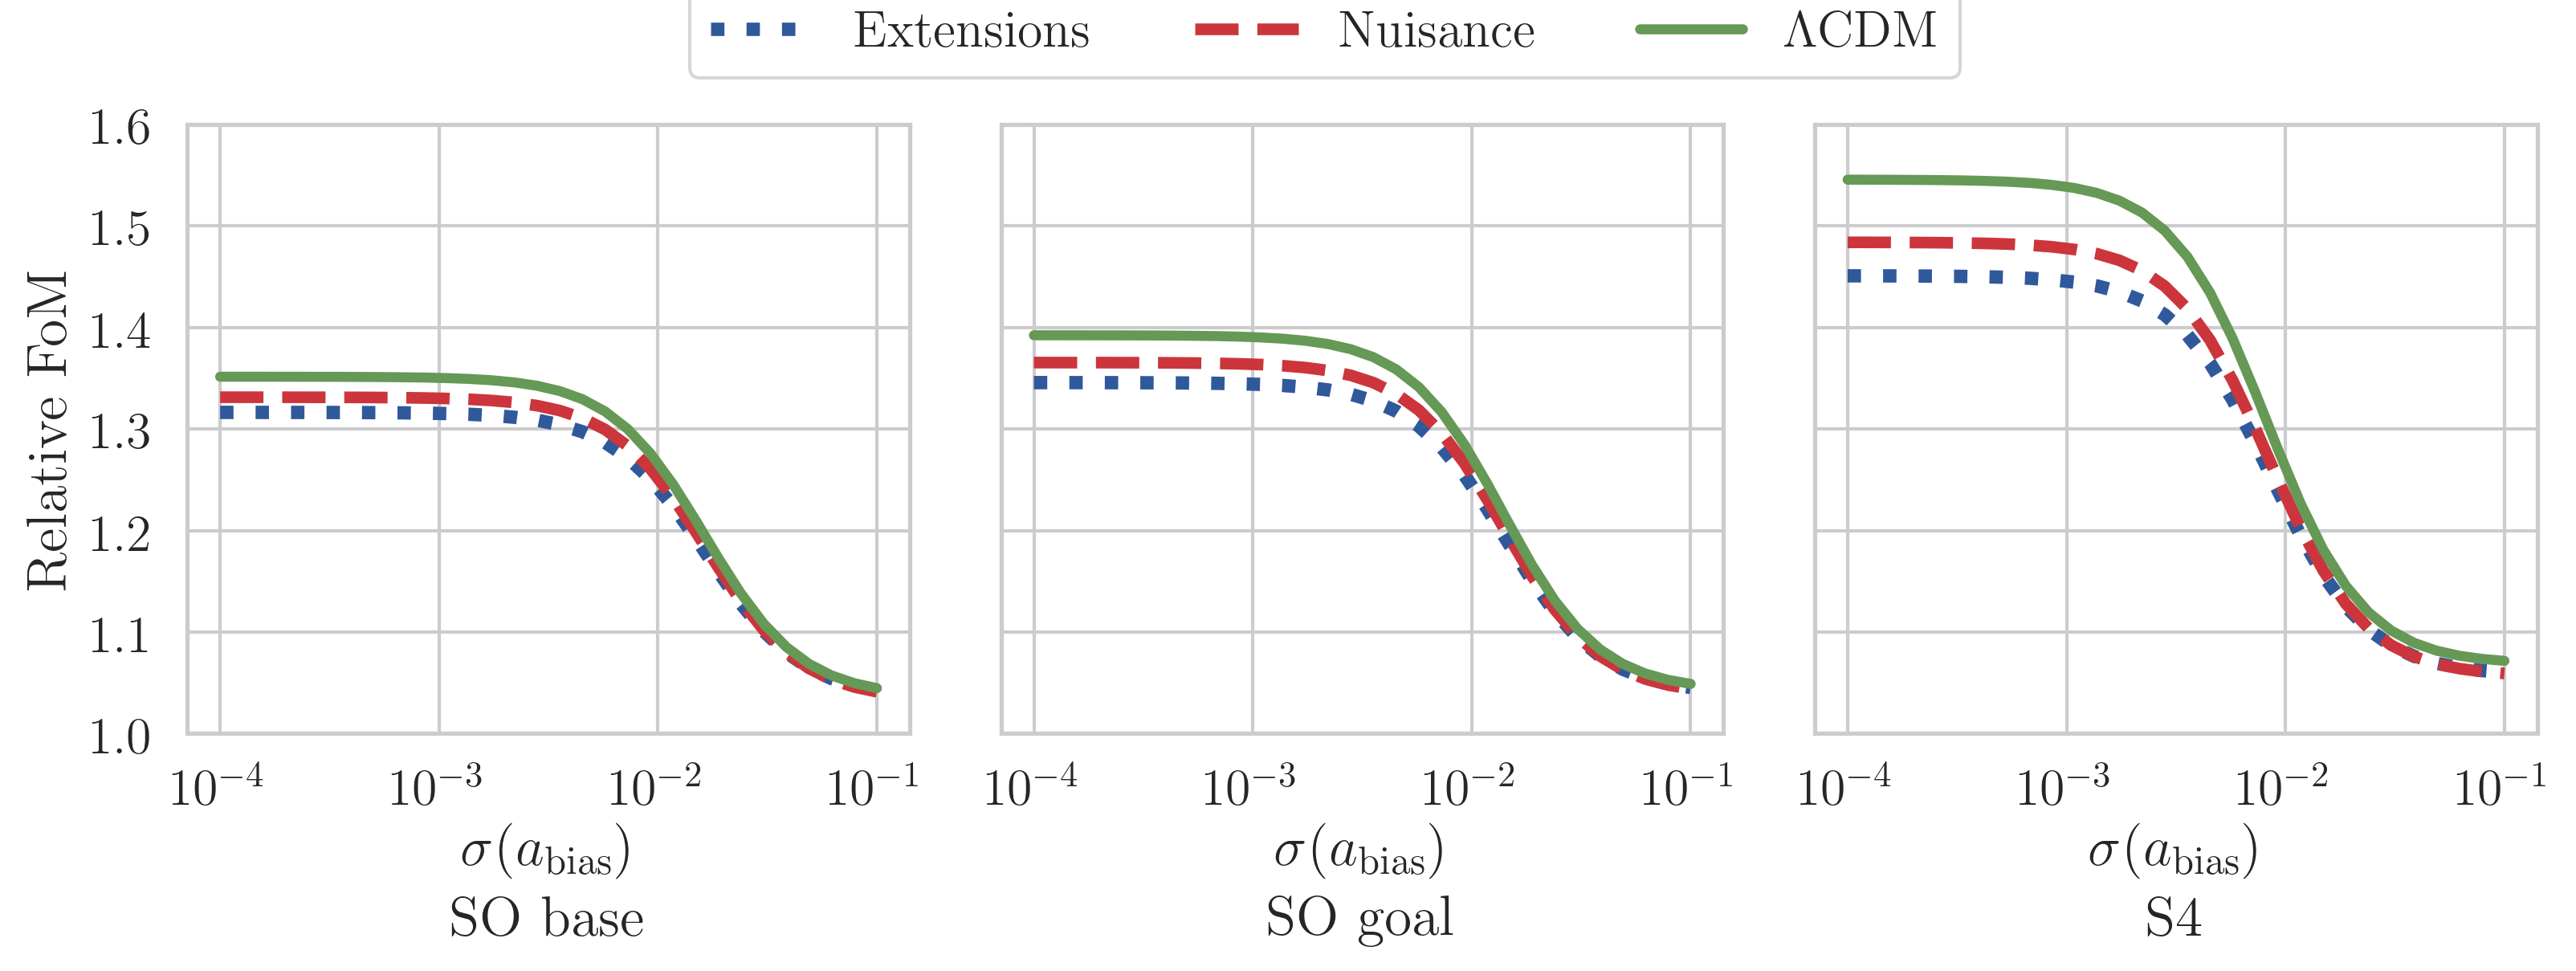

In [79]:
fig,axes = plt.subplots(1,3, sharey=True)
exps = ['SO base', 'SO goal', 'S4']

for exp_index,fdict in enumerate(meta_fom_list):
    
    ext_ratio = fdict['extensions']/meta_noclust_list[exp_index]['extensions']
    axes[exp_index].plot(sigma_abs, ext_ratio, color=param_space_colors[0],
                        linewidth=4, linestyle=':', label='Extensions')
    
    nuis_ratio = fdict['nuissance']/meta_noclust_list[exp_index]['nuissance']
    axes[exp_index].plot(sigma_abs, nuis_ratio, color=param_space_colors[1],
                        linewidth=3.5, linestyle='--', label='Nuisance')
    
    lcdm_ratio = fdict['LCDM']/meta_noclust_list[exp_index]['LCDM']
    axes[exp_index].plot(sigma_abs, lcdm_ratio, color=param_space_colors[2],
                        linewidth=3, label=r'$\Lambda$CDM')
    
    axes[exp_index].set_xscale('log')
    
axes[0].set_xlabel(r'$\sigma(a_\mathrm{bias})$' + '\nSO base')
axes[1].set_xlabel(r'$\sigma(a_\mathrm{bias})$' + '\nSO goal')
axes[2].set_xlabel(r'$\sigma(a_\mathrm{bias})$' + '\nS4')
axes[0].set_ylabel('Relative FoM')
    #axes[0].set_yscale('log')
for i in range(3):
    axes[i].set_yticks((1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6))
    axes[i].set_ylim((1, 1.6))


handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.set_size_inches(11,4)
fig.tight_layout()
fig.savefig('fom_of_abias.pdf', bbox_inches='tight')